In [2]:
import sys
from collections import deque
import numpy as np
import theano
import theano.tensor as T
import lasagne
sys.path.append("..")
from qtable import QAgent, SimpleMaze

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, CuDNN 4007)
/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [ ]:
maze = SimpleMaze()
agent = QAgent(actions=maze.actions, alpha=0.5, gamma=0.5, explore_strategy='epsilon', epsilon=0.2)
# logging
path = deque()  # path in this episode
episode_reward_rates = []
num_episodes = 0
cum_reward = 0
cum_steps = 0

# repeatedly run episodes
while True:
    maze.reset()
    new_observation = maze.observe()
    agent.reset()

    path.clear()
    path.append(new_observation)
    episode_reward = 0
    episode_steps = 0

    # interact and reinforce repeatedly
    while not maze.isfinished():
        action = agent.act(new_observation)
        new_observation, reward = maze.interact(action)
        agent.reinforce(current_observation=new_observation, reward=reward)

        path.append(new_observation)
        episode_reward += reward
        episode_steps += 1

    cum_steps += episode_steps
    cum_reward += episode_reward
    num_episodes += 1
    episode_reward_rates.append(episode_reward / episode_steps)
#     if num_episodes % 100 == 0:
#         print num_episodes, len(agent.q_table), 1.0 * cum_reward / cum_steps, path
#         cum_reward = 0
#         cum_steps = 0
win = 50

100 69 23.44 deque([(0, 2), (1, 2), (1, 1), (1, 2), (2, 2)])
200 71 35.5693950178 deque([(1, 2), (2, 2)])
300 73 34.3470790378 deque([(2, 1), (2, 2)])
400 74 32.2387096774 deque([(3, 1), (2, 1), (2, 2)])
500 74 34.9475524476 deque([(2, 3), (2, 2)])
600 76 31.1214953271 deque([(1, 2), (1, 1), (1, 2), (2, 2)])
700 76 33.3033333333 deque([(1, 1), (1, 2), (2, 2)])
800 76 35.6714285714 deque([(1, 2), (2, 2)])
900 76 33.0894039735 deque([(2, 4), (2, 3), (2, 2)])
1000 76 34.8222996516 deque([(2, 3), (3, 3), (3, 2), (2, 2)])
1100 76 31.9297124601 deque([(3, 0), (2, 0), (2, 1), (2, 2)])
1200 76 33.29 deque([(2, 4), (2, 3), (2, 2)])
1300 76 32.9801980198 deque([(3, 0), (2, 0), (2, 0), (1, 0), (1, 1), (1, 2), (2, 2)])
1400 76 33.8779661017 deque([(1, 4), (2, 4), (2, 3), (2, 2)])
1500 76 32.2322580645 deque([(1, 0), (1, 1), (1, 2), (2, 2)])
1600 76 35.4397163121 deque([(0, 3), (1, 3), (1, 2), (1, 1), (1, 2), (2, 2)])
1700 76 34.2123287671 deque([(2, 3), (2, 2)])
1800 76 30.8456790123 deque([(0, 3)

42.9982817869


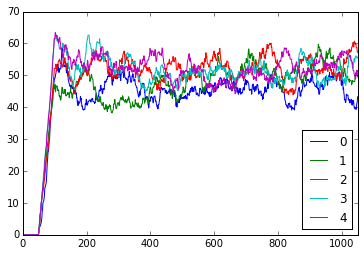

In [52]:
# alpha=0.1, gamma=0.1, epsilon=0.01
pd.rolling_mean(df, window=win, min_periods=1).plot()
print 1.0*cum_reward/cum_steps

37.7878444696


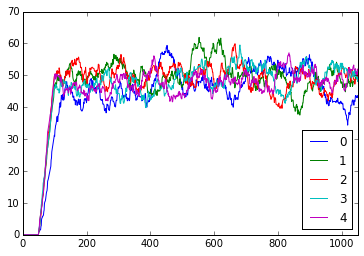

In [50]:
# alpha=0.1, gamma=0.1, epsilon=0.1
pd.rolling_mean(df, window=win, min_periods=1).plot()
print 1.0*cum_reward/cum_steps

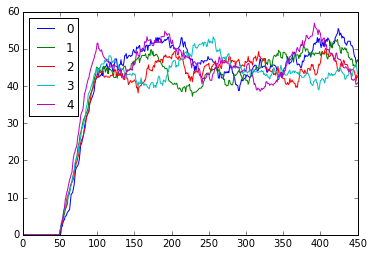

In [39]:
# alpha=0.5, gamma=0.1, epsilon=0.01
pd.rolling_mean(df, window=win, min_periods=1).plot()